In [3]:
# imporing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read the dataset

df = pd.read_csv('../FenModified1.csv')

In [5]:
#df.head()

In [6]:
#df.isnull().sum()

In [7]:
# turning the Date column to datetype object 
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2004-05-22
1      2004-05-23
2      2004-05-24
3      2004-05-25
4      2004-05-26
          ...    
5302   2018-11-27
5303   2018-11-28
5304   2018-11-29
5305   2018-11-30
5306          NaT
Name: Date, Length: 5307, dtype: datetime64[ns]

In [8]:
#df.info()

In [9]:
ind = int(len(df) - len(df)*0.20)
print(ind)

4245


In [10]:
# new_df = df.iloc[ind:]
# new_df.head()

In [11]:
# test_df = df.iloc[:ind]
# test_df

In [12]:
# feature selection
# X = test_df.drop(['Date','Cum. flow', 'Total flow'], axis=1)
# y = test_df['Total flow']

# X = df.drop(['Date','Cum. flow', 'Total flow'], axis=1)

X = df.drop(['Date','Cum. flow', 'Total flow'], axis=1)
y = df['Total flow']


### Splitting data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
#X_train = X[:ind].values
X_test_new = X[ind:].values
#y_train = y[:ind].values
y_test_new = y[ind:].values

In [16]:
#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# creating scaling model
scaler = MinMaxScaler()

In [19]:
# scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
print(lm.intercept_)

29.36443817571939


In [24]:
lm.coef_

array([ 136.42637945,   13.95191411, -165.38561266,  -30.06282378,
         -4.05154853])

In [25]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])

In [26]:
cdf

,Coef
Condensate,136.426379
Water,13.951914
CGR,-165.385613
WGR,-30.062824
Avg. Pressure,-4.051549


In [27]:
predictions = lm.predict(X_test)

In [28]:
predictions

array([18.99069328, 38.44608403, 36.68867874, ..., 19.98053   ,
       23.79934324, 25.38441435])

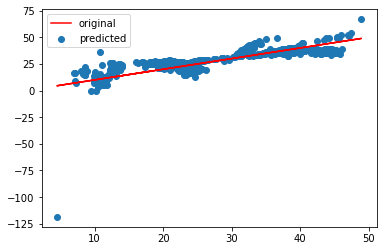

In [29]:
plt.scatter(y_test, predictions, label='predicted')
plt.plot(y_test, y_test, color='r', label='original')
plt.legend()


In [30]:
import seaborn as sns
#sns.distplot((y_test-predictions))

In [31]:
from sklearn import metrics

In [32]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

print('MAE: %0.3f' %mae)
print('MSE: %0.3f' %mse)
print('RMSE: %0.3f' %rmse)

MAE: 3.882
MSE: 34.247
RMSE: 5.852


In [33]:
X_test_new = scaler.transform(X_test_new)
new_predictions = lm.predict(X_test_new)

Text(0, 0.5, 'Total flow')

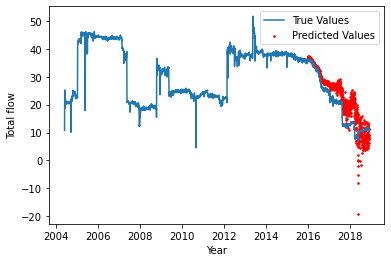

In [34]:
#plt.figure(figsize=(8,5))
plt.plot(df['Date'],df['Total flow'], label='True Values')
plt.scatter(df['Date'].iloc[ind:],new_predictions,marker='o',s=2.5,color='r',label='Predicted Values')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total flow')